In [3]:
pip install tensorflow --upgrade


  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl (385.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached ml_dtypes-0.4.0-cp39-cp39-win_amd64.whl (126 kB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached protobuf-4.25.4-cp39-cp39-win_amd64.whl (413 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  

In [5]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# load the cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

# class names for cifar-10
class_names = {'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'ship', 'horse', 'truck'}

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 265s 2us/step


In [15]:
def create_model(activation_function): 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)))# The Conv2D layers are used for convolution operations with 32 and 64 filters.
    model.add(layers.MaxPooling2D((2, 2)))#The MaxPooling2D layers downsample the feature maps.
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function)) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function)) 
    
    model.add(layers.Flatten()) # the flatten layer converts the 2d feature maps into a 1d vector
    model.add(layers.Dense(64, activation=activation_function)) 
    model.add(layers.Dense(10))# output layer for 10 classes
    
    return model

In [16]:
def compile_and_train(model, optimizer, epochs=3):
  model.compile(optimizer = optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  history = model.fit(train_images, train_labels, epochs=epochs,
                      validation_data =(test_images, test_labels))
  
  return history

In [17]:
activation_functions = ['relu', 'sigmoid', 'tanh']
optimizers = ["adam","sgd",'rmsprop'] 

results = {}

for activation in activation_functions:
  for optimizer in optimizers:
    print(f"Training with {activation} activation and {optimizer} optimizer...")
    model = create_model(activation)
    history = compile_and_train(model, optimizer, epochs = 3)
    results[(activation, optimizer)] = history

Training with relu activation and adam optimizer...


C:\Users\CSSE1028038\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3416 - loss: 1.7793 - val_accuracy: 0.5307 - val_loss: 1.3066
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5653 - loss: 1.2355 - val_accuracy: 0.6000 - val_loss: 1.1182
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6202 - loss: 1.0737 - val_accuracy: 0.6344 - val_loss: 1.0265
Training with relu activation and sgd optimizer...
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1860 - loss: 2.1841 - val_accuracy: 0.3706 - val_loss: 1.7530
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3832 - loss: 1.7014 - val_accuracy: 0.4319 - val_loss: 1.5722
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4533 - loss: 1.5043 - val_accuracy: 0.4773 - val_loss: 1.4337
Training with relu activation and rmsprop optimizer...
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3500 - loss: 1.7691 - val_accuracy: 0.5623 - val_loss

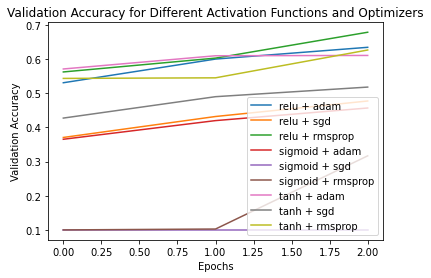

In [26]:
def plot_results(results):
    for key, history in results.items():
        plt.plot(history.history['val_accuracy'], label=f'{key[0]} + {key[1]}')
        
    plt.title('Validation Accuracy for Different Activation Functions and Optimizers')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()
    
plot_results(results)